In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Sale Order History 09-09-2020.xlsx')

In [3]:
df['Bill_Amt']

0        28158.0
1       172572.0
2        17368.0
3        24708.0
4        47100.0
          ...   
7234         0.0
7235       662.0
7236       501.0
7237       106.0
7238       271.0
Name: Bill_Amt, Length: 7239, dtype: float64

In [4]:
sales = df[['SO_DATE','Bill_Amt']]

In [5]:
sales.dropna(inplace=True)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
sales.columns = ['Month','Sales']

In [7]:
sales.set_index('Month',inplace=True)

In [8]:
sales.size

7239

In [9]:
sales_mean = sales.resample('D').sum()

In [10]:
sales_mean.shape

(71, 1)

In [11]:
sales_mean.dropna(inplace=True)

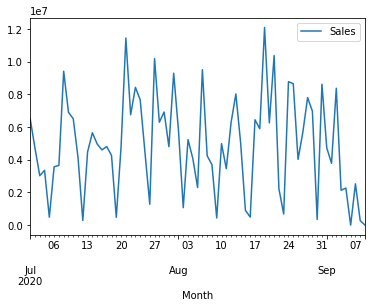

In [12]:
sales_mean.plot()

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

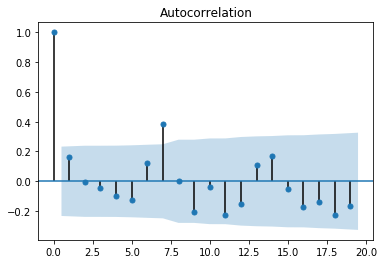

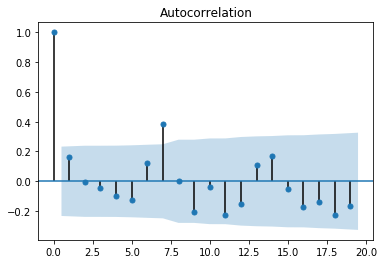

In [14]:
plot_acf(sales_mean['Sales'])

In [15]:
sales_diff = sales_mean.diff(periods=1)

In [16]:
sales_diff = sales_diff[1:]

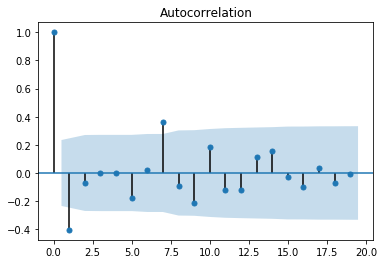

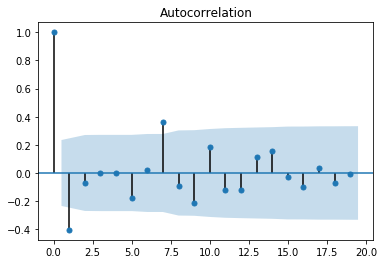

In [17]:
plot_acf(sales_diff)

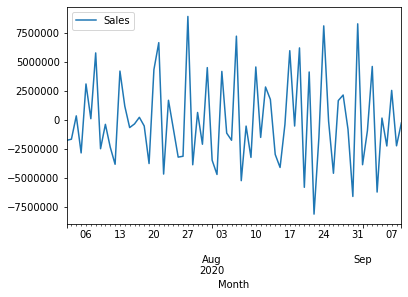

In [18]:
sales_diff.plot()

In [19]:
X = sales_mean.values

In [20]:
train = X[:55]
test = X[55:]

In [21]:
train.size

55

In [22]:
test.size

16

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model_arima = ARIMA(train,order=(7,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1767.3367625807277


In [25]:
predictions = model_arima_fit.forecast(steps=15)[0]

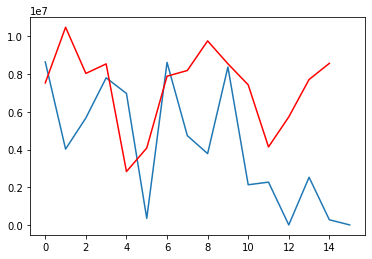

In [26]:
plt.plot(test)
plt.plot(predictions,'r')

In [29]:
import itertools
p=d=q=range(0,10)
pdq=itertools.product(p,d,q)

In [30]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=(param))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1798.1699789843426
(0, 0, 1) 1799.1902143944715
(0, 0, 2) 1801.1374274076745
(0, 0, 3) 1801.2720524821411
(0, 0, 4) 1800.5697453071607
(0, 0, 5) 1797.9015045324275
(0, 0, 6) 1799.8916064629466
(0, 0, 7) 1797.6096510996272
(0, 0, 8) 1799.607151225716
(0, 0, 9) 1799.4957451606515
(0, 1, 0) 1795.7688605207184
(0, 1, 1) 1772.3664198799866
(0, 1, 2) 1772.9299194597033
(0, 1, 3) 1775.64902848386
(0, 1, 4) 1775.297116106116
(0, 1, 5) 1778.2987477821416
(0, 1, 6) 1778.1803672910992
(0, 1, 8) 1770.595071105146
(0, 1, 9) 1772.5138005350882
(0, 2, 0) 1814.9624655903708
(0, 2, 1) 1777.213376268119
(0, 2, 2) 1751.6490784024145
(0, 2, 3) 1752.1346398550124
(0, 2, 4) 1768.4269895396205
(0, 2, 5) 1767.8000985278159
(0, 2, 6) 1769.2997902790494
(0, 2, 8) 1768.8362698483602
(0, 2, 9) 1767.828003726515
(1, 0, 0) 1799.2940962361881
(1, 0, 1) 1801.1790794698986
(1, 0, 2) 1799.4278375320876
(1, 0, 3) 1800.936020220225
(1, 0, 4) 1801.2087535965652
(1, 0, 5) 1799.8960281347659
(1, 0, 6) 1801.6416425

In [ ]:
import statsmodels.api as sm

In [29]:
model = sm.tsa.statespace.SARIMAX(sales_mean['Sales'],order=(9,1,1),seasonal_order=(9,1,1,12))
result = model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [31]:
sales_mean['forecast'] = result.predict(start=55,end=70,dynamic=True)

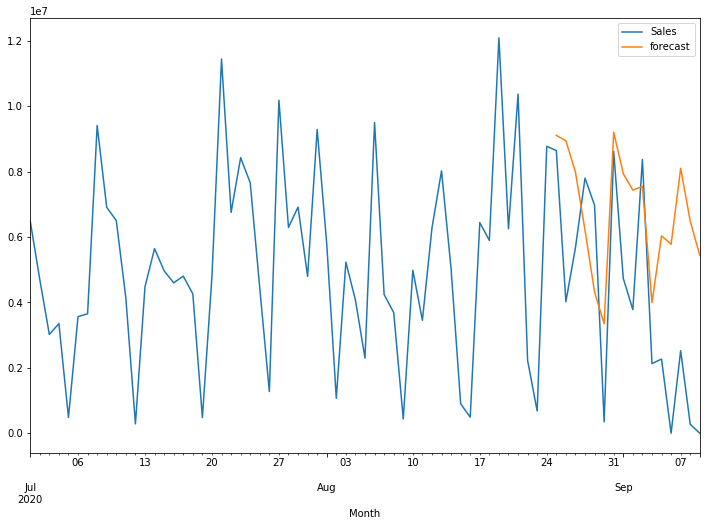

In [32]:
sales_mean[['Sales','forecast']].plot(figsize=(12,8))

In [33]:
sales_mean['forecast'].tail()

Month
2020-09-05    6.037580e+06
2020-09-06    5.779669e+06
2020-09-07    8.103787e+06
2020-09-08    6.487872e+06
2020-09-09    5.439767e+06
Freq: D, Name: forecast, dtype: float64

In [34]:
from pandas.tseries.offsets import DateOffset

In [35]:
future_dates = [sales_mean.index[-1] + DateOffset(days=x) for x in range(0,60)]

In [36]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=sales_mean.columns)

In [37]:
future_df = pd.concat([sales_mean,future_dates_df])

In [38]:
future_df['forecast'] = result.predict(start=69,end=130,dynamic=True)

In [39]:
a = result.predict(start=69,end=130,dynamic=True)

In [40]:
a

2020-09-08    1.311611e+06
2020-09-09    2.068312e+06
2020-09-10    7.876732e+06
2020-09-11    3.711381e+06
2020-09-12    2.579959e+06
                  ...     
2020-11-04    1.864866e+06
2020-11-05    6.751453e+05
2020-11-06   -3.313117e+06
2020-11-07   -2.887078e+06
2020-11-08   -1.520913e+06
Freq: D, Length: 62, dtype: float64

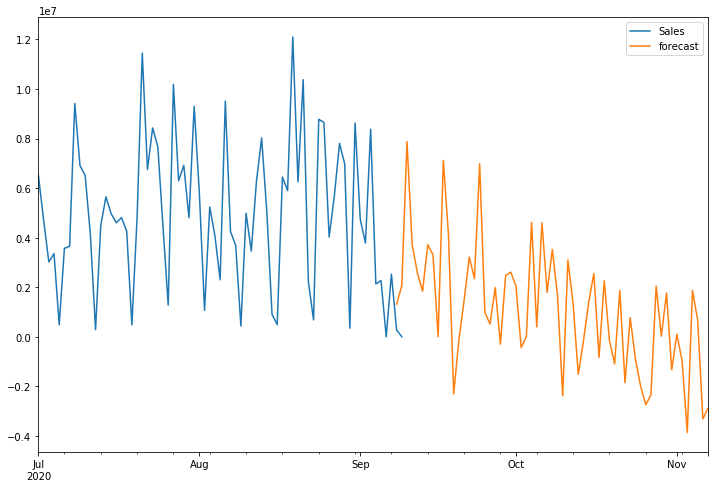

In [41]:
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [44]:
X.sum()

348510641.86

In [45]:
a.sum()

65573304.719644